In [6]:
import torchvision
from torchvision import models, datasets, transforms
import torch
import torch.optim as optim
from torch.autograd import Variable
from torch.utils.data import Dataset, DataLoader
import scipy.misc as misc
import utils
import os
import numpy as np
from models.VGG19_1.data_loader import Dataloader
import time

%load_ext autoreload
%autoreload 2

In [4]:
pwd

'C:\\Users\\rsbandhu\\Documents\\MUSTBACKUP\\Details\\Computers\\Python'

# Instantiating the model from the torch site

In [16]:
vgg19 = models.vgg19_bn(pretrained=True)
for param in vgg19.parameters():
    param.requires_grad = False
vgg19

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace)
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (9): ReLU(inplace)
    (10): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (12): ReLU(inplace)
    (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (14): Conv2d(128, 256, kernel_size=(3, 3)

In [17]:
features = list(vgg19.classifier.children())[:-3]
vgg19.classifier = torch.nn.Sequential(*features)
vgg19

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace)
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (9): ReLU(inplace)
    (10): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (12): ReLU(inplace)
    (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (14): Conv2d(128, 256, kernel_size=(3, 3)

# Run all the images (resized to 224 X 224 and normalized to 0 mean and stddev =1 ) through the VGG19 pretrained network except the final FC layer

In [22]:
cur_dir = os.getcwd()
print(cur_dir)
json_path = os.path.join(cur_dir,'models\VGG19_1\params.json')
params = utils.Params(json_path)
data_loader = Dataloader(params)


vgg19_eval = vgg19.eval()
image_feature_dict = {}
image_dict = data_loader.load_data("train", params)
img_count = 0
t0 = time.time()
for img_id in image_dict:
    if (img_count %500 == 0):
        t1 = time.time()
        print("image count = ", img_count, t1-t0)
        t0 = t1
    input_img = data_loader.load_single_image("train", params, img_id)
    vgg19_eval_out = vgg19_eval(input_img)
    image_feature_dict[img_id] = vgg19_eval_out

    img_count += 1

print("Finished evaluation, next step is to save the data to file")

f = open("image_resize224_feature4096.txt", "w")
for item in key_list:
    val = str(image_feature_dict[item].tolist())
    f.write(item+":"+val+"\n")
f.close()

C:\Users\rsbandhu\Documents\MUSTBACKUP\Details\Computers\DeepLearning_Stanford_CS230\Project\all\CS230_Protein_Atlas_Classification-master\Code
C:\Users\rsbandhu\Documents\MUSTBACKUP\Details\Computers\DeepLearning_Stanford_CS230\Project\all\train
train
datatype is train
image id count =  31072
image count =  0 0.0
image count =  500 676.0679607391357
image count =  1000 732.849915266037
image count =  1500 784.7934126853943
image count =  2000 635.7731037139893
image count =  2500 648.7410137653351
image count =  3000 632.0973634719849
image count =  3500 624.4790012836456
image count =  4000 659.1295218467712
image count =  4500 639.6981887817383
image count =  5000 673.1828234195709
image count =  5500 637.7255628108978
image count =  6000 633.0835666656494
image count =  6500 771.5349795818329
image count =  7000 776.5852119922638
image count =  7500 779.4720463752747
image count =  8000 779.9058120250702
image count =  8500 773.4134390354156
image count =  9000 774.6058115959167
im

In [ ]:
import models.VGG19_1.net as net

cur_dir = os.getcwd()
print(cur_dir)
json_path = os.path.join(cur_dir,'models\VGG19_1\params.json')
params = utils.Params(json_path)
data_loader = Dataloader(params)

labels_dict = data_loader.load_labels("train", params)

In [ ]:
# Shuffle the images for training 
key_list = []
for key in img_feature:
    key_list.append(key)
np.random.shuffle(key_list)
print(key_list[0], key_list[20])

#Instantiate the model, loss fn, Optimizer
model = net.Net(params)
optimizer = optim.Adam(model.parameters(), lr= params.learning_rate)
criterion = nn.BCELoss()

# Define some parameters
image_count = len(labels_dict)
minibatch_size = params.batch_size
num_epochs = params.num_epochs
channels = 3    
num_batches = (image_count +1) // params.batch_size
batch_data = torch.zeros([minibatch_size, 4096], dtype=torch.float32)
batch_labels = torch.zeros([28, minibatch_size], dtype=torch.float32)

In [ ]:
print(minibatch_size, params.learning_rate, params.num_epochs)
#minibatch lr epochs cost
#32 2e-4 100 0.202
#32 1e-4 100 0.198
#32 5e-5 100 0.219
#16 1e-4 100 0.204
#16 1e-4 100 0.191  random shuffle in each epoch
#64 1e-4 100 0.221  random shuffle in each epoch 
#64 1e-5 100 0.211  random shuffle in each epoch
#64 1e-5 100 0.219  w/o random shuffle in each epoch
#64 1e-3 100 0.1827 w/o random shuffle in each epoch
#64 2e-3 100 0.196 w/o random shuffle in each epoch
#128 1e-3 100 0.17 w/o random shuffle in each epoch
#128 5e-3 100 0.194 w/o random shuffle in each epoch

In [ ]:
#Train the model over a few epochs
for epoch in range(num_epochs):
    #np.random.shuffle(key_list)
    print("\n******************\n Epoch = ", epoch,"\n")
    for j in range(num_batches):
        mini_batch_index_start = j*minibatch_size
        mini_batch_index_end = (j+1)*minibatch_size
        batch_image_index = key_list[mini_batch_index_start:mini_batch_index_end ]
        #print(j, mini_batch_index_start)
        
        # Generate mini-batch data and labels
        for k in range(minibatch_size):
            img_id = key_list[mini_batch_index_start + k]
            batch_data[k,:] = img_feature[img_id]
            labels = torch.tensor(labels_dict[img_id], dtype= torch.float32)
            batch_labels[:,k] = labels
        
        #print(img_id)
        
        # clear previous gradients
        optimizer.zero_grad()

        #forward propogation
        output_batch = model.forward(batch_data)

        #calculate the loss
        loss = criterion(output_batch,batch_labels)
        
        # backward propogation
        loss.backward()
        
        # performs parameter updates using calculated gradients
        optimizer.step()
        
        #cost = loss.item()
        #print(cost)
        # print statistics
        
        '''
        for param in model.fc1.parameters():
            for k in range(len(param.size())):
                print(param[k])
        ''' 
        if (j%50 ==0):
            cost = loss.item()
            print('Batch #:' + str(j) + ", training cost = " + str(cost))
        if ((j+1)% num_batches ==0):
            cost = loss.item()
            print('Batch #:' + str(j) + ", End training cost = " + str(cost))
key_list[0] 
labels_dict[img_id].shape

In [151]:
import seaborn as sns
import matplotlib as mpl

[1.2885e+04 1.2540e+03 3.6210e+03 1.5610e+03 1.8580e+03 2.5130e+03
 1.0080e+03 2.8220e+03 5.3000e+01 4.5000e+01 2.8000e+01 1.0930e+03
 6.8800e+02 5.3700e+02 1.0660e+03 2.1000e+01 5.3000e+02 2.1000e+02
 9.0200e+02 1.4820e+03 1.7200e+02 3.7770e+03 8.0200e+02 2.9650e+03
 3.2200e+02 8.2280e+03 3.2800e+02 1.1000e+01]


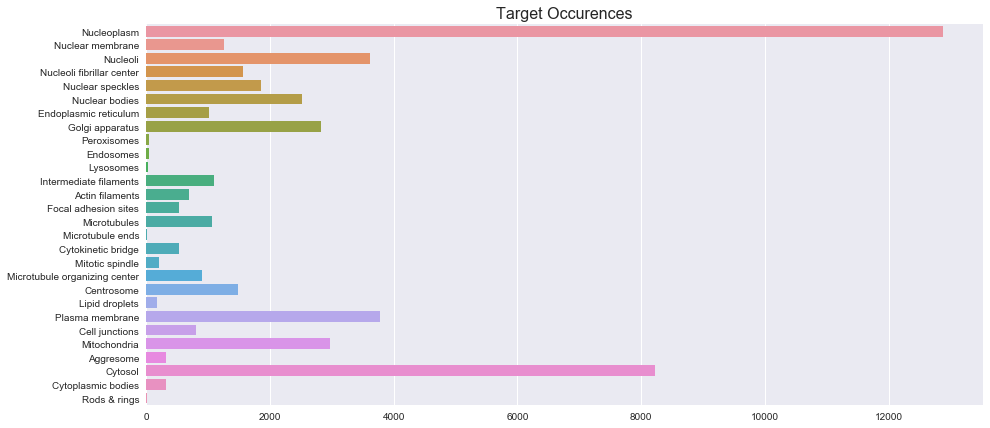

In [160]:
# Target labels
LABEL_MAP = {
    0: "Nucleoplasm",
    1: "Nuclear membrane",
    2: "Nucleoli",
    3: "Nucleoli fibrillar center",   
    4: "Nuclear speckles",
    5: "Nuclear bodies",
    6: "Endoplasmic reticulum",
    7: "Golgi apparatus",
    8: "Peroxisomes",
    9:  "Endosomes",
    10: "Lysosomes",
    11: "Intermediate filaments", 
    12: "Actin filaments",
    13: "Focal adhesion sites",
    14: "Microtubules",
    15: "Microtubule ends",
    16: "Cytokinetic bridge",
    17: "Mitotic spindle",
    18: "Microtubule organizing center",  
    19: "Centrosome",
    20: "Lipid droplets",
    21: "Plasma membrane",
    22: "Cell junctions",
    23: "Mitochondria",
    24: "Aggresome",
    25: "Cytosol",
    26: "Cytoplasmic bodies",
    27: "Rods & rings"
}

# Defines
DIM_HEIGHT = DIM_WIDTH = 512
N_CHANNELS = 4

label = np.zeros((28))
for j in range(len(labels_dict)):
    item = key_list[j]
    tgt_label = labels_dict[item]
    label += tgt_label
    
print(label)
xx = list(LABEL_MAP.values())

plt.figure(figsize=(15, 7))
mpl.style.use('seaborn-darkgrid')
sns.barplot(x = label, y = xx)
plt.title('Target Occurences', fontsize=16)
plt.show()


In [167]:
params.train_data_path

'C:\\Users\\rsbandhu\\Documents\\MUSTBACKUP\\Details\\Computers\\DeepLearning_Stanford_CS230\\Project\\all\\train'

# Instantiating the model and initializing the weights from my laptop, downloaded from the torch sitem the local machine. Don't need this now

In [8]:
from models.VGG19_1.vgg import VGG
#from models import vgg
vgg19_bn = VGG.vgg19_bn(pretrained=False)
curdir = os.getcwd()
vgg_dict_path = os.path.join(curdir, "models/VGG19_1/vgg19_bn-c79401a0.pth")
model_vgg19_bn.load_state_dict(torch.load(vgg_dict_path))

for param in model_vgg19_bn.parameters():
    param.requires_grad = False

AttributeError: type object 'VGG' has no attribute 'vgg19_bn'

In [74]:
for x in model_vgg19_bn.classifier.children():
    print(x)
    for y in x.parameters():
        print(y.requires_grad)
for x in model_vgg19_bn.modules():
    print(x.state_dict().keys())
import json
cur_dir = os.getcwd()
print(cur_dir)
json_path = os.path.join(cur_dir,'models\params.json')
f = open(json_path)
params = json.load(f)
#params = utils.Params(json_path)
data_loader = Dataloader(params)

odict_keys(['features.0.weight', 'features.0.bias', 'features.1.weight', 'features.1.bias', 'features.1.running_mean', 'features.1.running_var', 'features.3.weight', 'features.3.bias', 'features.4.weight', 'features.4.bias', 'features.4.running_mean', 'features.4.running_var', 'features.7.weight', 'features.7.bias', 'features.8.weight', 'features.8.bias', 'features.8.running_mean', 'features.8.running_var', 'features.10.weight', 'features.10.bias', 'features.11.weight', 'features.11.bias', 'features.11.running_mean', 'features.11.running_var', 'features.14.weight', 'features.14.bias', 'features.15.weight', 'features.15.bias', 'features.15.running_mean', 'features.15.running_var', 'features.17.weight', 'features.17.bias', 'features.18.weight', 'features.18.bias', 'features.18.running_mean', 'features.18.running_var', 'features.20.weight', 'features.20.bias', 'features.21.weight', 'features.21.bias', 'features.21.running_mean', 'features.21.running_var', 'features.23.weight', 'features.2